<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/module%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import math
pi = math.pi


def lagrangeCoefficient(inputArr,outputArr,enteredValue,variable):                 #defines lagrange coefficient
  lc = 1
  for i in range(len(inputArr)):
    if i == enteredValue:
      continue
    else:
      lc = lc*(variable - inputArr[i])/(inputArr[enteredValue]-inputArr[i])        #computes lagrange coefficient
  return lc

def lagrangeInterpolator(inputArr, outputArr, variable):                           #defines lagrange Interpolator
  li = 0
  for i in range(len(inputArr)):                     
    li = li + lagrangeCoefficient(inputArr,outputArr,i,variable)*outputArr[i]      #builds lagrange Interpolator
  return li

In [240]:
inputPoints = [pi/2,pi/2+.1,pi/2+.2,pi*(1)]
outputPoints = [math.cos(x) for x in inputPoints]

We are now going to use Newton Raphson Method to find the root of our function. The parameters we will need at this moment are initial vaue of x, the function we have taken and its derivative. We can represent the Newton Raphson Method by the following equation.

$$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$


In [241]:
def newtonRaphson(function, derivative, currentValue):
  return currentValue - function(currentValue)/(-derivative(currentValue))

def newton(function, derivative, initial, tolerrance, maxIterations):
  x = initial
  for counter in range(maxIterations):
    if derivative(x) == 0:
    
      return None
    if abs(function(x))< tolerrance:
      return [x,counter]
    x = newtonRaphson(function, derivative, x)
 
  return None

In [242]:
newton(math.cos,math.sin,pi/2,.00001,20)

[1.5707963267948966, 0]

In [243]:
seed_Values = [pi/2,pi,pi/2+.1,1,3,10,15,3*pi+.01,pi+.01]
roots = []
iterations = []
for seed in seed_Values:
  if newton(math.cos,math.sin,seed,1e-10,20) != None:
    roots.append(newton(math.cos,math.sin,seed,1e-10,20)[0])
    iterations.append(newton(math.cos,math.sin,seed,1e-10,20)[1])
  else:
    roots.append('None Found')
    iterations.append('>20')

In [244]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations']),
                 cells=dict(values = [seedValues,roots,iterations]))
                     ])
fig.show()

In [245]:
roots[-2]/pi


34.5

Secant Method
We'll create the new value as

$$
x_{n+1}=x_i-\frac{f(x_i)\left(x_i-x_{i-1}\right)}{f(x_i)-f(x_{i-1})}
$$
Rather than just return a pair of values as before, 

In [246]:
 def secant(function, newValue, initial):
  x = initial - (function(initial)*(initial - newValue)/(function(initial)-function(newValue)))
  return x

def secantFunction(function, firstValue, secondValue, iterations):
  x= [firstValue,secondValue]
  for i in range(iterations):
    x.append(secant(function,firstValue,secondValue))
  return x

In [247]:
secantFunction(math.cos,pi/2,pi,5)

[1.5707963267948966,
 3.141592653589793,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966]

In [248]:
secantFunction(math.cos,pi/2,pi,8)

[1.5707963267948966,
 3.141592653589793,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966]

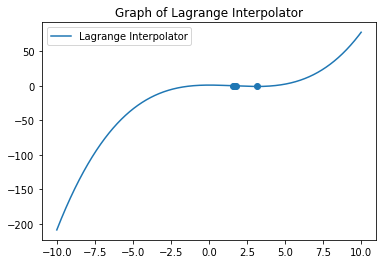

In [249]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( -10,10,.001)
plt.scatter(inputPoints,outputPoints)
plt.plot(x,lagrangeInterpolator(inputPoints,outputPoints,x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator'])

plt.show()